# Implementación de un preprocesamiento de texto

## Importación de librerías
Importamos las librerías necesarias para realizar el preprocesamiento de texto.

In [39]:
!pip install --quiet wordcloud

In [21]:
import re

import pandas as pd
import spacy
from tqdm import tqdm
from unidecode import unidecode

tqdm.pandas()

# Carga el modelo de lenguaje.
# En caso de no tenerlo instalado, ejecutar el siguiente comando:
# python -m spacy download en_core_web_sm
# Para español: es_core_news_sm
nlp = spacy.load('en_core_web_sm')

## Normalización de texto
La normalización de texto es un paso importante en el preprocesamiento de texto. Consiste en realizar una serie de transformaciones para que el texto sea más fácil de procesar. Lo que hicimos en este caso fue:
1. **Tokenizar el texto**: separar el texto en palabras.
2. **Limpiar el texto**: eliminar las URLs, menciones, hashtags, signos de puntuación, espacios, dígitos y palabras con menos de 2 caracteres.
3. **Lemmatizar el texto**: convertir las palabras a su forma base.

In [34]:
def normalize(text: str) -> str:
    
    text = text.lower() # Convertir el texto a minúsculas
    text = re.sub(r"[^\x00-\x7F]+", "", text) # Eliminar caracteres no ASCII
    text = re.sub("[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", "", text) # Eliminar emails
    text = re.sub(r"http\S+", "", text) # Eliminar URLs
    text = re.sub(r"@\S+", "", text) # Eliminar menciones
    text = re.sub(r"#\S+", "", text) # Eliminar hashtags
    text = re.sub(r"RT", "", text) # Eliminar RT
    text = re.sub(r"\s+", " ", text) # Eliminar espacios en blanco
    text = re.sub(r"[^a-zA-Z]", " ", text) # Eliminar caracteres que no sean letras
    text = ' '.join(unidecode(word) for word in text.split()) 
    text = ' '.join([word.text for word in nlp(text) if not (word.is_punct or word.is_stop or word.like_num)]) 
    text = ' '.join([word.text for word in nlp(text) if len(word) > 2]) 
    text = ' '.join([word.text for word in nlp(text) if len(set(word.text)) > 1])
    text = ' '.join([word.lemma_ for word in nlp(text)]) 
    return text

In [35]:
sentences = [
    "RT I'm learning Python and      I'm enjoying it. :) >.<",
    "I have a website at https://www.example.com with discounts.",
    "What do you think about the new product from @company? #opinions",
    "RT @user: Thanks for the retweet. Great article! 😃",
    "10 ways to improve your mental health. #health #wellness 🧘",
    "I'm 25 years old. I was born in 1995.",
    "b̴̢̛̙̤̮͚̘̹̫̦̭̮̺̰͖͐̋̄̅͊͂̑̓̉̇̎͘̕ͅu̷̢͚̠̳̒͌͆̽̕̕ę̵̣̟̺͇̙͓͍̭̲̘̱̗͉̆̃̇͜͜ṅ̵̢̥̱̳̙̫̩̘̪̣̬͓͇̮̕͜ȁ̵̙͖̗̓̆́̊́̈́̕s̸̛͉͉͓̮͌͜",
    "zzzz", "Hahaha", "eye"
]

for sentence in sentences:
    print("\nTexto original:", sentence)
    print("Texto normalizado:", normalize(sentence))


Texto original: RT I'm learning Python and      I'm enjoying it. :) >.<
Texto normalizado: learn python enjoy

Texto original: I have a website at https://www.example.com with discounts.
Texto normalizado: website discount

Texto original: What do you think about the new product from @company? #opinions
Texto normalizado: think new product

Texto original: RT @user: Thanks for the retweet. Great article! 😃
Texto normalizado: thank retweet great article

Texto original: 10 ways to improve your mental health. #health #wellness 🧘
Texto normalizado: way improve mental health

Texto original: I'm 25 years old. I was born in 1995.
Texto normalizado: year old bear

Texto original: Zalgo text: b̴̢̛̙̤̮͚̘̹̫̦̭̮̺̰͖͐̋̄̅͊͂̑̓̉̇̎͘̕ͅu̷̢͚̠̳̒͌͆̽̕̕ę̵̣̟̺͇̙͓͍̭̲̘̱̗͉̆̃̇͜͜ṅ̵̢̥̱̳̙̫̩̘̪̣̬͓͇̮̕͜ȁ̵̙͖̗̓̆́̊́̈́̕s̸̛͉͉͓̮͌͜
Texto normalizado: zalgo text buena

Texto original: zzzz
Texto normalizado: 

Texto original: Hahaha
Texto normalizado: hahaha

Texto original: eye
Texto normalizado: eye


## Preprocesamiento de un dataset

In [36]:
# Cargo el dataset
df = pd.read_csv('../data/cyberbullying.csv')
# Renombra las columnas
df.columns = ['text', 'label']

# Normalizar el texto
df['text_preprocessed'] = df['text'].progress_apply(normalize)

# Eliminar las filas con texto preprocessado vacío
df = df[df['text_preprocessed'] != '']

# Guardar el dataset preprocesado
df.to_csv('../data/cyberbullying_preprocessed.csv', index=False)

# Display the first rows
df.head()

100%|██████████| 81417/81417 [25:56<00:00, 52.31it/s]


,text,label,text_preprocessed
0,"In other words #katandandre, your food was cra...",0,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,white
2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh thank head concern angry dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,0,isis account pretend kurdish account like isla...


In [36]:
df = pd.read_csv('../data/cyberbullying_preprocessed.csv')
df.head()

,text,label,text_preprocessed
0,"In other words #katandandre, your food was cra...",0,word katandandre food crapilicious mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",0,meh thank head concerned angry dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,0,isis account pretend kurdish account like isla...


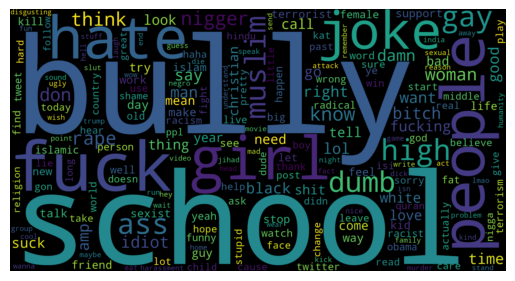

In [44]:
# Generar una nube de palabras
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

world_cloud_text = ' '.join(df['text_preprocessed'])
wordcloud = WordCloud(collocations = False, width = 2048, height = 1080).generate(world_cloud_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()